# <center> <font color = brown> Predicting second-hand Car Price </font></center>

<center>
<img src="https://images.unsplash.com/photo-1605559424843-9e4c228bf1c2?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8bWVyY2VkZXMlMjBjYXJ8ZW58MHx8MHx8fDA%3D&w=1000&q=80" width=500>
</center>

<div class="alert alert-block alert-info">

## Introduction : 🚗 🚙 🚐

There is a significant number of 2nd hand cars being sold in the U.S.A , so, I collected a dataset containing the details of those cars and wanted to figure out what factors actually contribute to the 2nd hand pricing of the car and wanted to build a model which can predict the price of any given 2nd hand car. <br>
    
The objective of this project is to analyze a dataset containing details of second-hand cars and use statistical models to predict car prices based on various criteria. By examining this dataset, I aim to answer several business questions as stated below, related to second-hand car pricing and gain insights that can help in decision-making processes within the automotive industry.
<br>
By conducting this analysis, I aim to provide valuable insights into the factors that influence the pricing of second-hand cars and offer actionable information for various stakeholders in the automotive industry. The findings of this project can be used to guide pricing strategies, aid in the assessment of car value, and enhance decision-making processes related to buying and selling second-hand cars in the automotive industry

### Business Questions which I'm going to answer:
- Which car manufacturers and models have the highest resale value?

- How does the car's production year impact its price?

- Is there a correlation between the car's mileage and its price?

- How does the number of cylinders impact the price?

- What is the distribution of cars based on fuel type, drive wheels, or gearbox type?

- What is the most common color for second-hand cars?

- How does the presence of airbags affect the price?

I performed data cleaning , and pre processing before conducting statistical analysis to gain more insights. In order to use predictive models we need a baseline model first and then a model with better accuracy. Baselines are also very important as they can help in gaining more insights and can also be used for testing assumptions. In this project I used Linear Regression as baseline model and as expected it has a very low accuracy. For higher accuracy model I used SVM(Support Vector Machine). 

</div>



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
}

sns.set(rc=rc)
raw_data = pd.read_csv('car_price_prediction.csv')
raw_data.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
15608,45730889,15458,836,HYUNDAI,Genesis,2010,Coupe,Yes,Petrol,2,93238 km,4.0,Automatic,Front,04-May,Left wheel,White,4
7228,45802891,41547,639,HYUNDAI,Santa FE,2014,Jeep,Yes,Diesel,2,133169 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6703,45781952,15681,-,MERCEDES-BENZ,E 420,1996,Sedan,Yes,LPG,4.2,125000 km,8.0,Automatic,Rear,04-May,Left wheel,Black,12
19035,45811240,20385,-,BMW,550,2008,Sedan,Yes,Petrol,4.8,227000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Black,8
3335,45813697,470,574,HONDA,Civic,2010,Sedan,Yes,Hybrid,1.3,264132 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12


<div class="alert alert-block alert-info">
A brief explanation of unknown features : <br>
<b>Levy:</b> it is the importing and exporting tax of the car 
</div>

In [3]:
raw_data = raw_data.rename(columns = {'Prod. year':'Production_year','Leather interior':'Leather_interior',
                                      'Fuel type':'Fuel_type','Engine volume':'Engine_volume',
                                      'Gear box type':'Gearbox_type','Drive wheels':'Drive_wheels'}).copy()

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Production_year   19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather_interior  19237 non-null  object 
 8   Fuel_type         19237 non-null  object 
 9   Engine_volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gearbox_type      19237 non-null  object 
 13  Drive_wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<div class="alert alert-block alert-info">
Let's check our Target variable which is  "Price"
    </div>

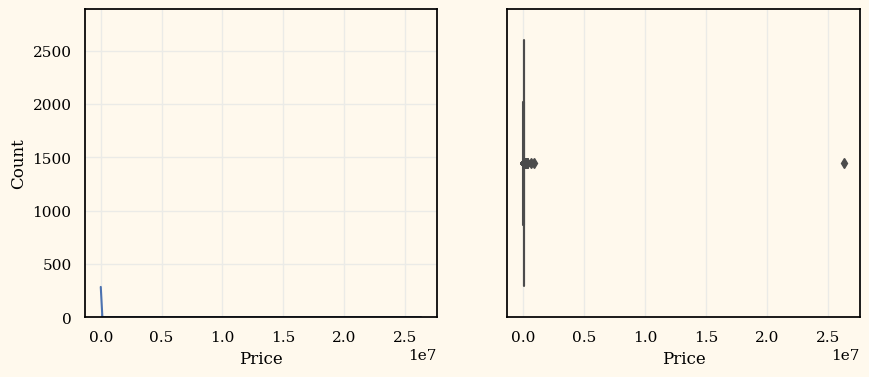

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data = raw_data , x= 'Price',ax=axs[0], kde = True)
sns.boxplot(data=raw_data, x='Price',ax=axs[1])
plt.show()

<div class="alert alert-block alert-info">
    
Our target variable has too many outliers and also containing illogical values (could be wrong inputs)
</div>

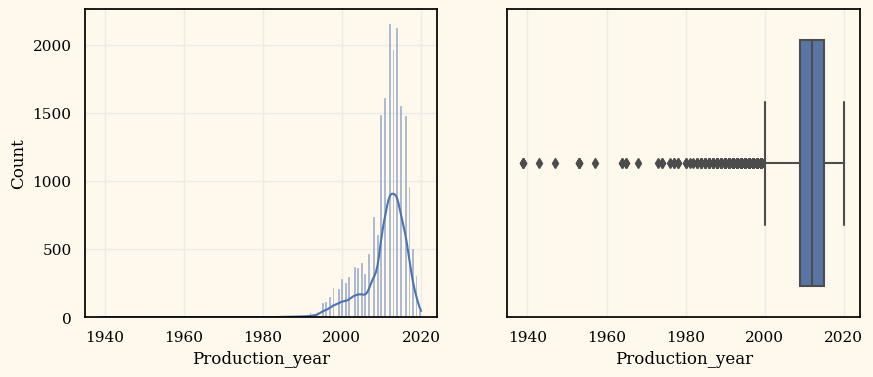

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data = raw_data , x= 'Production_year',ax=axs[0], kde = True)
sns.boxplot(data=raw_data, x='Production_year',ax=axs[1])
plt.show()

<div class="alert alert-block alert-info">
It can be clearly seen that maximum of the 2nd hand cars being sold are manufactured from 2008 to 2014 approx. <br>
Also there are many vintage cars present for selling!
    </div>

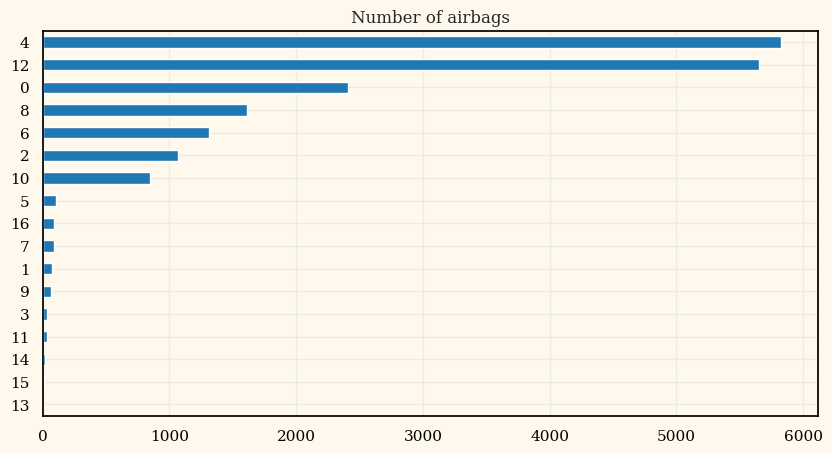

In [7]:
ax = raw_data['Airbags'].value_counts().sort_values()\
        .plot(kind = 'barh',title = 'Number of airbags',figsize =(10,5),colormap='tab20')
plt.show()

<div class="alert alert-block alert-info">
Most common is 4 airbags which is usually for sedans and hatchbacks, and 12 is for SUVs
    </div>

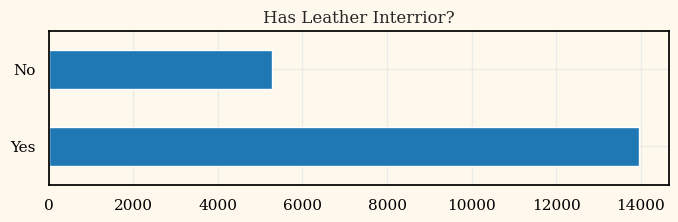

In [8]:
ax = raw_data['Leather_interior'].value_counts()\
        .plot(kind = 'barh',title = 'Has Leather Interrior?',figsize =(8,2),colormap='tab20')
plt.show()

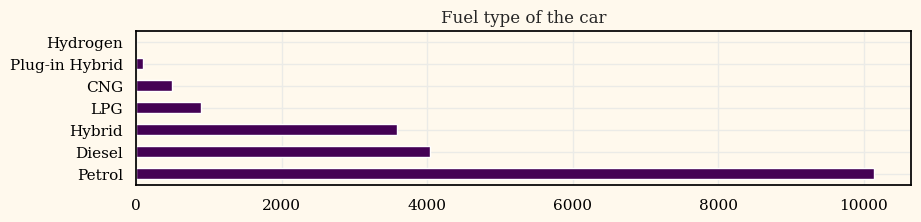

In [9]:
ax = raw_data['Fuel_type'].value_counts()\
        .plot(kind = 'barh',title = 'Fuel type of the car',figsize =(10,2),colormap='viridis')
plt.show()

<div class="alert alert-block alert-info">
Petrol cars dominates second hand car market !
    </div>

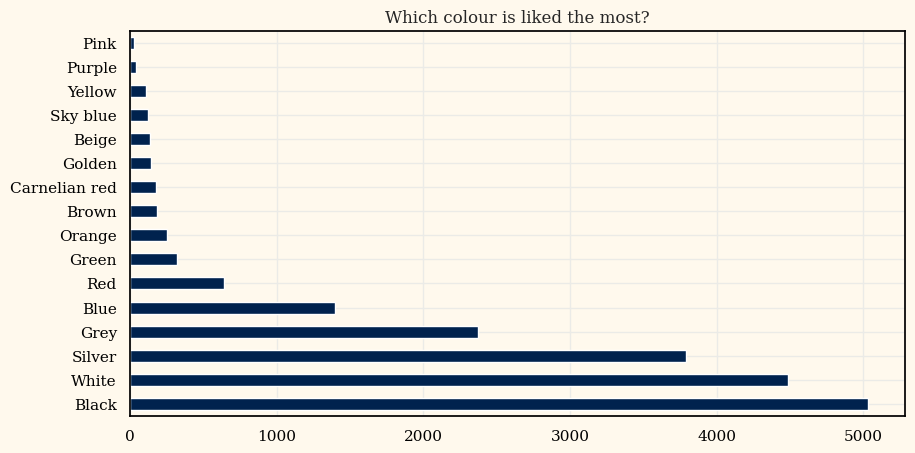

In [10]:
ax = raw_data['Color'].value_counts()\
        .plot(kind = 'barh',title = 'Which colour is liked the most?',figsize =(10,5),colormap='cividis')
plt.show()

<div class="alert alert-block alert-info">

Black, White and Silver is mainly favoured colour, so answering one of our business questions : <br>
<b>What is the most common colour for second-hand cars?<b> <br>
Black Second hand cars are sold the most followed by White and Silver
    </div>

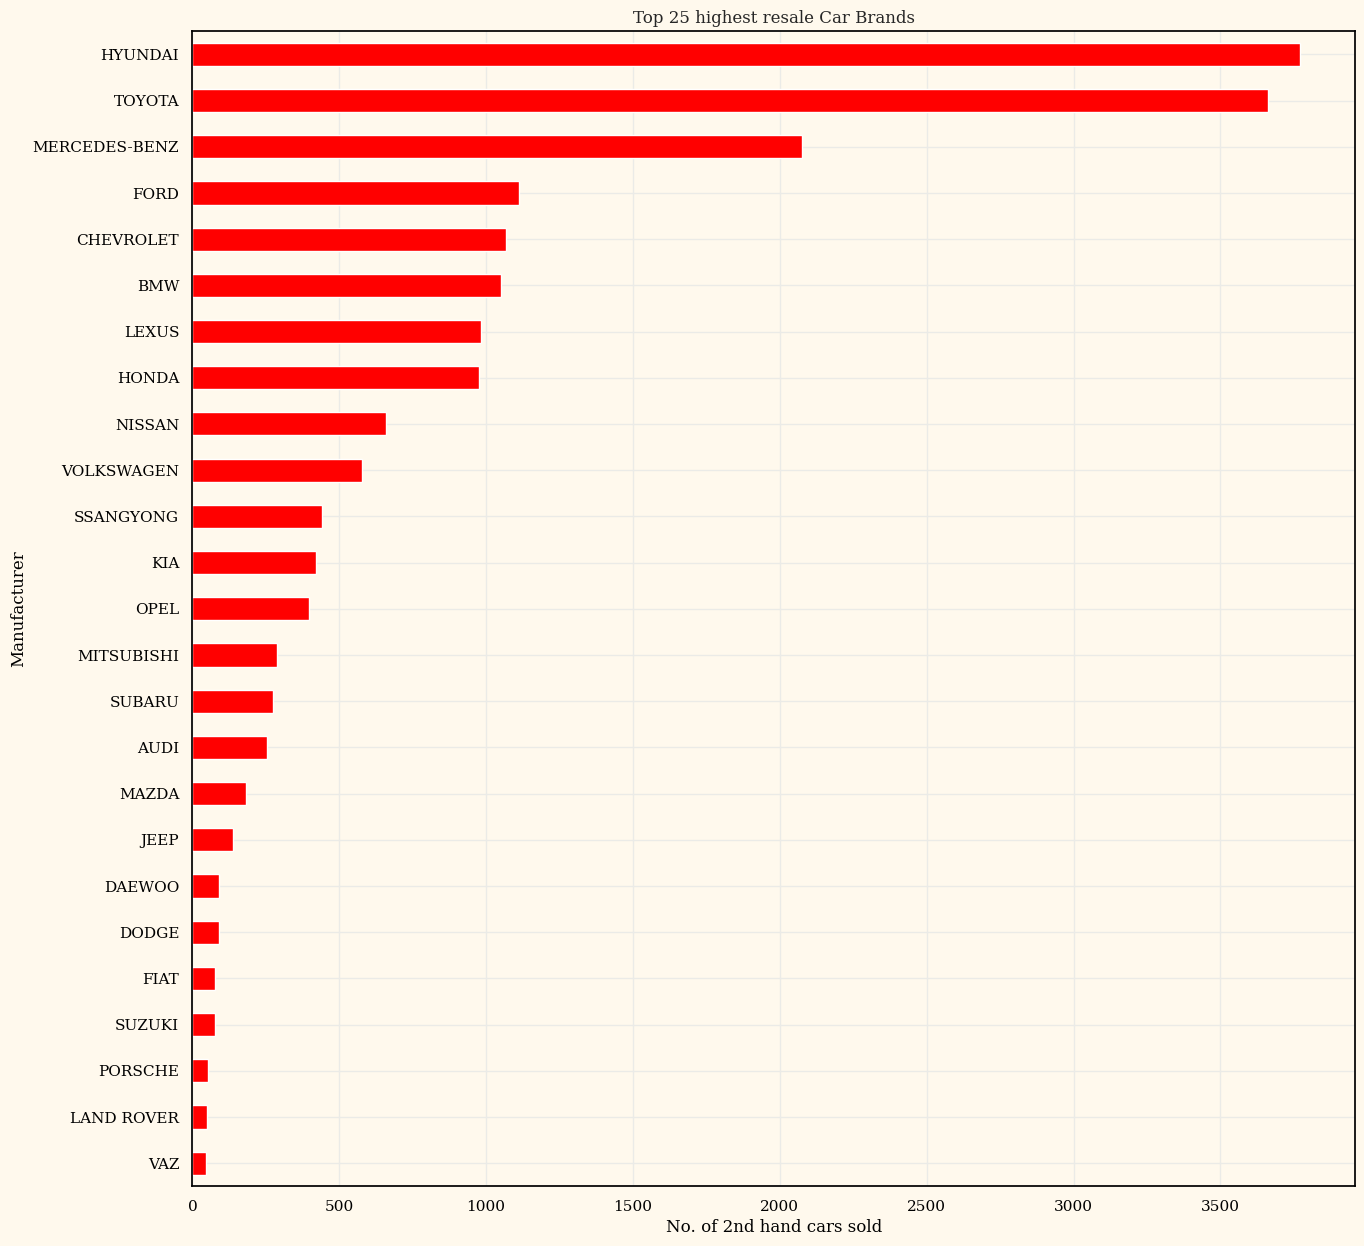

In [11]:
ax = raw_data['Manufacturer'].value_counts().head(25).sort_values()\
        .plot(kind = 'barh',title = "Top 25 highest resale Car Brands", figsize =(15,15),colormap='autumn')
ax.set_xlabel('No. of 2nd hand cars sold')
ax.set_ylabel('Manufacturer')
plt.show()

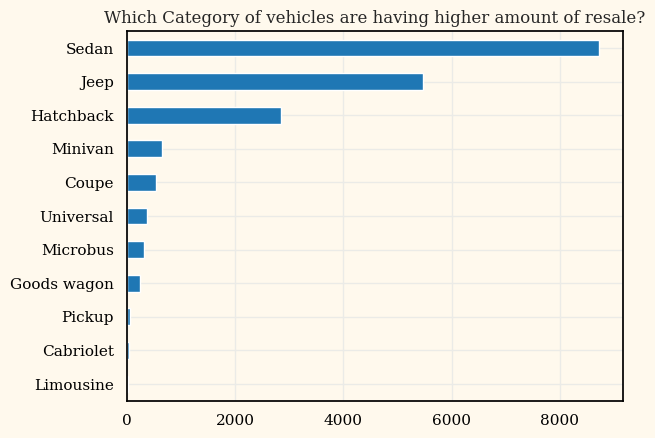

In [12]:

raw_data['Category'].value_counts().sort_values()\
.plot(kind = 'barh',title = 'Which Category of vehicles are having higher amount of resale?',colormap='tab20')
plt.show()

<div class="alert alert-block alert-info">

### <font color = navy> Understanding of the dataset</font>
- From the Brands graph it can be seen that Asian car brands have the highest number of resales in USA, namely the top 2 spots by Hyundai and Toyota followed by other brands. Usually these are cheaper alternatives to costlier European brands such as Mercedes-Benz, Audi, BMW etc., (Even though these are also very common brands) as a result common population prefers cheaper cars over others. Also fuel efficiency is another reason for prefering these brands even if they are second-hand cars.
- From the Category graph it is clear that most customers buying the second hand cars prefer Sedans, Jeeps and Hatchback over other available category variants. So,an increase in availability of sedans, Jeeps and hatchbacks in the automobile industry could be a good approach for companies selling second hand cars.
- From the Production year graph it can be clearly seen that more than 50% of the second hand cars being sold are manufactured around 2010
- It can also be seen that there are cars from the 1970s and prior to that also, and from the table it was inferred that these vintage cars cant have such low resale value of 150$ ! certainly these are incorrect values and needs to be checked before dropping.

</div>

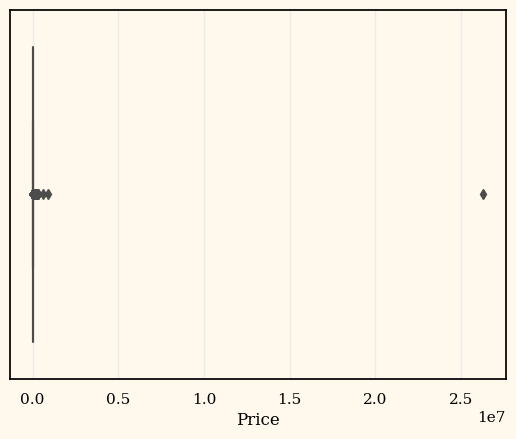

In [13]:
# Checking the Price distribution as previously done this feature contained outliers.
sns.boxplot(data=raw_data, x='Price')
plt.show()

<div class="alert alert-block alert-info">

There is a serious outlier issue with our column "Price" as we can see a few extreme values. And it has been seen that illogical values has been set for second hand cars, for example : an OPEL Combo was given a value of 26307500$ which can be seen in the boxplot (the right most point). <br>
We need to drop these outliers as well as some of the vintage cars from the Production year feature. <br>
we need to drop the "Doors" feature as it is entirely wrongly entered.

</div>

In [14]:
raw_data.columns
data = raw_data[['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Production_year',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gearbox_type', 'Drive_wheels',
       #'Doors', 
        'Wheel', 'Color',
       'Airbags']].copy()

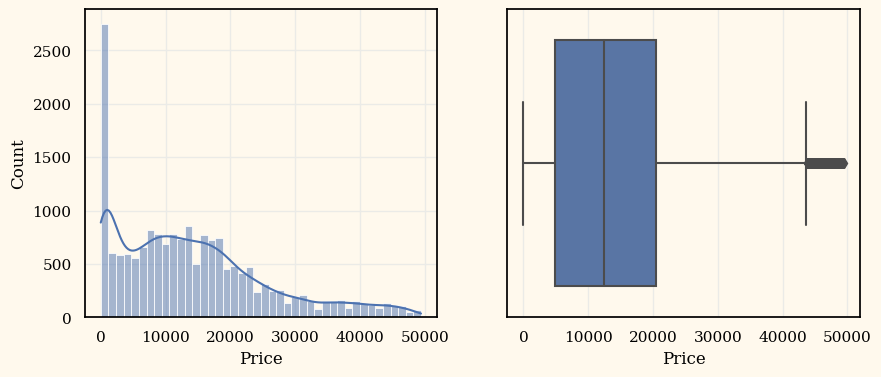

In [15]:
q = data['Price'].quantile(0.95)
data2 = data[data['Price'] < q]

fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data = data2 , x= 'Price',ax=axs[0], kde = True)
sns.boxplot(data=data2, x='Price',ax=axs[1])
plt.show()

<div class="alert alert-block alert-info">

50% of the second-hand cars sold are priced below 12000$ approx.
</div>

In [16]:
p = data2['Production_year'].quantile(0.01)
df_clean = data2[data2['Production_year'] > p]

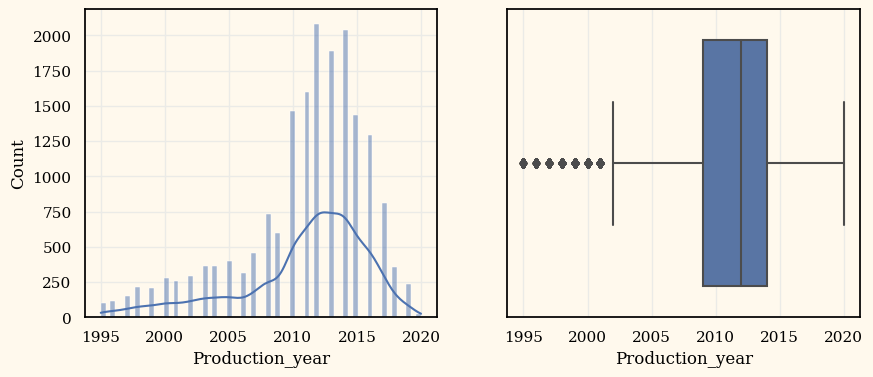

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data = df_clean , x= 'Production_year',ax=axs[0], kde = True)
sns.boxplot(data=df_clean, x='Production_year',ax=axs[1])
plt.show()

<div class="alert alert-block alert-info">

75% of the second-hand cars are manufactured before 2015
    
</div>

In [18]:
df_clean.describe(include = 'all')

,ID,Price,Levy,Manufacturer,Model,Production_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gearbox_type,Drive_wheels,Wheel,Color,Airbags
count,1.808600e+04,18086.000000,18086,18086,18086,18086.000000,18086,18086,18086,18086,18086,18086.000000,18086,18086,18086,18086,18086.000000
unique,NaN,NaN,530,58,1455,NaN,11,2,7,101,7250,NaN,4,3,2,16,NaN
top,NaN,NaN,-,TOYOTA,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,Left wheel,Black,NaN
freq,NaN,NaN,5372,3568,1082,NaN,8392,13012,9431,3643,679,NaN,12880,12346,16610,4636,NaN
mean,4.558503e+07,14322.595156,NaN,NaN,NaN,2010.920767,NaN,NaN,NaN,NaN,NaN,4.548380,NaN,NaN,NaN,NaN,6.633197
std,8.862710e+05,11663.448190,NaN,NaN,NaN,5.037737,NaN,NaN,NaN,NaN,NaN,1.157327,NaN,NaN,NaN,NaN,4.304530
min,2.324298e+07,1.000000,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,4.569642e+07,5018.000000,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,4.000000
50%,4.577216e+07,12544.000000,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,6.000000
75%,4.580186e+07,20385.000000,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,12.000000


In [19]:
df_clean['Mileage'] = df_clean['Mileage'].str.strip(' km')


In [20]:
df_clean.head(5)

,ID,Price,Levy,Manufacturer,Model,Production_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gearbox_type,Drive_wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [21]:
df_clean['Engine_volume'] = df_clean['Engine_volume'].str.replace('Turbo','')
df_clean['Levy'] = df_clean['Levy'].str.replace('-','0')


In [22]:
df_clean['Engine_volume'] = df_clean['Engine_volume'].astype('float')
df_clean['Mileage'] = df_clean['Mileage'].astype('float')
df_clean['Levy'] = df_clean['Levy'].astype('float')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18086 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18086 non-null  int64  
 1   Price             18086 non-null  int64  
 2   Levy              18086 non-null  float64
 3   Manufacturer      18086 non-null  object 
 4   Model             18086 non-null  object 
 5   Production_year   18086 non-null  int64  
 6   Category          18086 non-null  object 
 7   Leather_interior  18086 non-null  object 
 8   Fuel_type         18086 non-null  object 
 9   Engine_volume     18086 non-null  float64
 10  Mileage           18086 non-null  float64
 11  Cylinders         18086 non-null  float64
 12  Gearbox_type      18086 non-null  object 
 13  Drive_wheels      18086 non-null  object 
 14  Wheel             18086 non-null  object 
 15  Color             18086 non-null  object 
 16  Airbags           18086 non-null  int64 

<div class="alert alert-block alert-info">

<b> Now that we have a fair idea about the features and outliers are removed we can move forward to bivariate analysis
and testing OLS assumptions so that we can perform Linear regression and predict the price

</div>

## <b>Which car manufacturers and models have the highest resale value?

In [23]:
df_clean.groupby('Manufacturer')[['Price','Model']].agg(max).sort_values(by = 'Price')

,Price,Model
Manufacturer,,
ROVER,3000,416
SEAT,5959,Leon
UAZ,6272,Patriot
PONTIAC,6600,G6
SAAB,7840,09-Mar
GREATWALL,10036,C30
DAIHATSU,10349,YRV
LANCIA,12231,Musa
DAEWOO,12432,Matiz


<div class="alert alert-block alert-info">
So, from the stat we can clearly say that the manufacturer and model having highest resale value <br>
is <b>Hyundai Kona</b> priced at <b>49431$</b>

</div>

## <b>How does the car's production year impact its price?

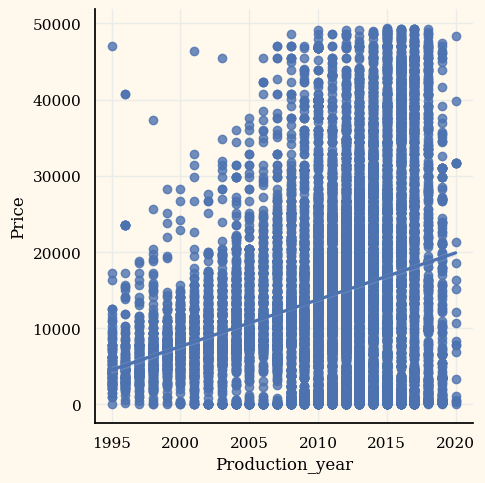

In [24]:
sns.lmplot(x='Production_year',y='Price',data=df_clean)
plt.show()

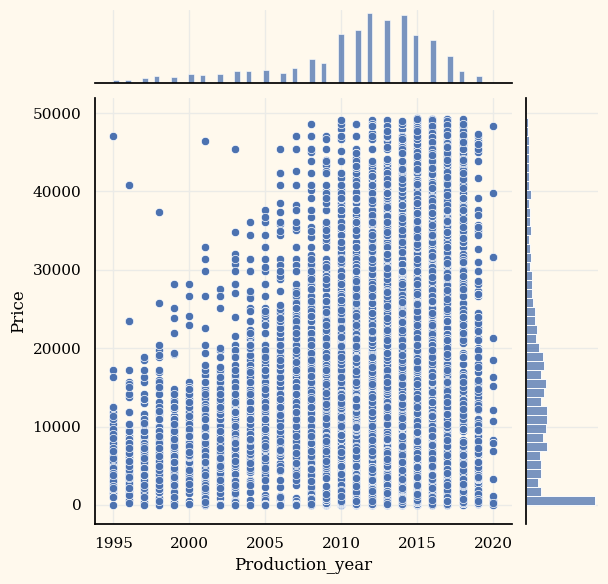

In [25]:
sns.jointplot(x='Production_year',y='Price',data=df_clean)
plt.show()

<div class="alert alert-block alert-info">
From the above 2 plots we can say this much that , the more recent the production year of the car is, the higher the resale price gets for it's resale value compared to 2nd hand cars which are older, which is a known fact but we can confirm now.
</div>    

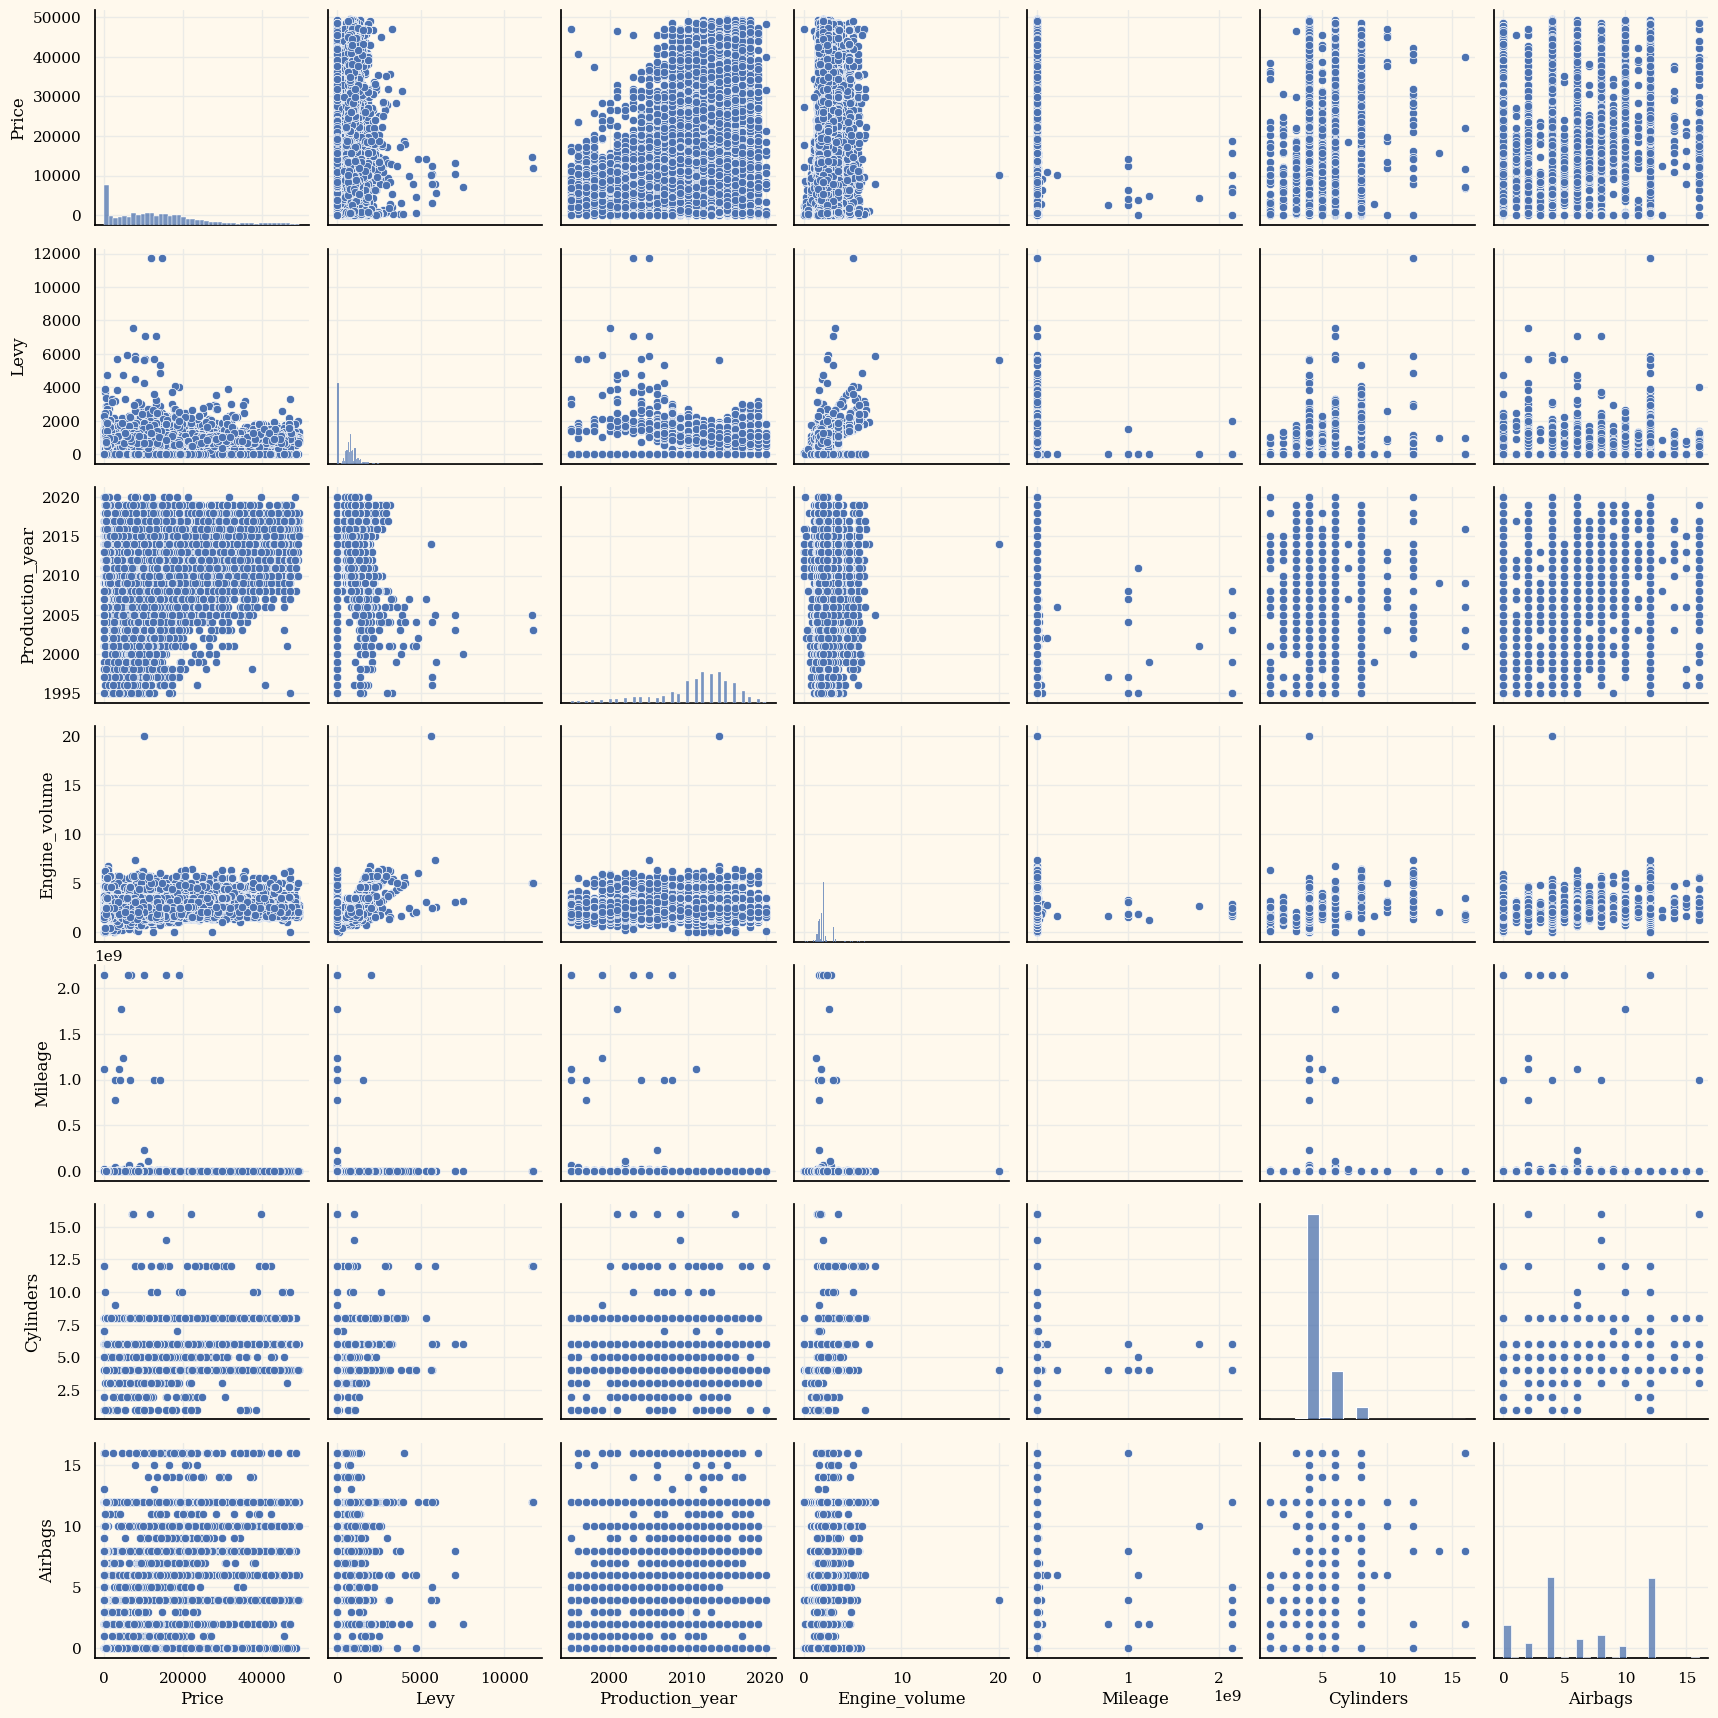

In [26]:
sns.pairplot(df_clean[['Price', 'Levy', 'Manufacturer', 'Model', 'Production_year',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gearbox_type', 'Drive_wheels', 'Wheel', 'Color',
       'Airbags']])
plt.show()

<div class="alert alert-block alert-info">

## Now we are ready to perform Linear Regression, our baseline model which we are going to use for predicting the 2nd hand car prices
</div>

#### Checking OLS assumptions

- Multicollinearity check: 

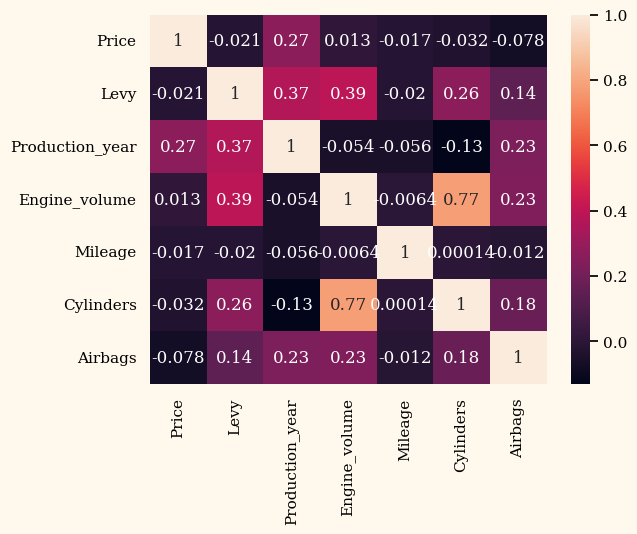

In [27]:
df_corr = df_clean[['Price', 'Levy','Production_year',
    'Engine_volume', 'Mileage','Cylinders','Airbags']].corr()
sns.heatmap(df_corr,annot= True)
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df_clean[['Price', 'Levy','Production_year',
    'Engine_volume', 'Mileage','Cylinders','Airbags']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [29]:
vif

,VIF,Features
0,2.545199,Price
1,2.678501,Levy
2,20.009535,Production_year
3,22.844876,Engine_volume
4,1.001859,Mileage
5,41.459815,Cylinders
6,3.610388,Airbags


Dropping the values with very high VIF as 0-5 is the acceptable range. All the other VIF values will get adjusted after removing the varaibles with high VIF

In [30]:
df = df_clean.drop(['ID','Production_year','Engine_volume','Cylinders','Model','Gearbox_type','Drive_wheels','Wheel'],axis = 1)


In [31]:
df = df[df['Manufacturer'].\
        isin(['TOYOTA','HYUNDAI','MERCEDES-BENZ','CHEVROLET', 'FORD', 'BMW' ,'HONDA'])]
df = df[df['Fuel_type'].isin(['Diesel','Petrol','Hybrid'])]
df = df[df['Color'].isin(['Black','White','Silver','Grey','Blue'])]
df = df[df['Category'].isin(['Sedan','Jeep','Hatchback'])]

In [32]:
variables = df[['Price', 'Levy',
     'Mileage','Airbags']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
vif

,VIF,Features
0,1.695612,Price
1,2.315289,Levy
2,1.000352,Mileage
3,2.504286,Airbags


Creating Dummy variables : 

In [33]:
df_dummy = pd.get_dummies(df,drop_first = True)

In [34]:
df_dummy

,Price,Levy,Mileage,Airbags,Manufacturer_CHEVROLET,Manufacturer_FORD,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_MERCEDES-BENZ,Manufacturer_TOYOTA,Category_Jeep,Category_Sedan,Leather_interior_Yes,Fuel_type_Hybrid,Fuel_type_Petrol,Color_Blue,Color_Grey,Color_Silver,Color_White
1,16621,1018.0,192000.0,8,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,8467,0.0,200000.0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,3607,862.0,168966.0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1
4,11726,446.0,91901.0,4,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
5,39493,891.0,160931.0,4,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645.0,307325.0,12,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
19231,5802,1055.0,107800.0,12,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0
19234,26108,836.0,116365.0,4,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
19235,5331,1288.0,51258.0,4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0


## Perfroming Linear Regression

In [35]:
# target and input variables decalaration 
target = df_dummy['Price']
inputs = df_dummy.drop(['Price'],axis = 1)

In [36]:
# scaling the independent variables 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_sc = scaler.transform(inputs)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_sc,target, test_size= 0.4, random_state = 50)

In [38]:
from sklearn.linear_model import LinearRegression 

In [39]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
yhat = reg.predict(x_train)

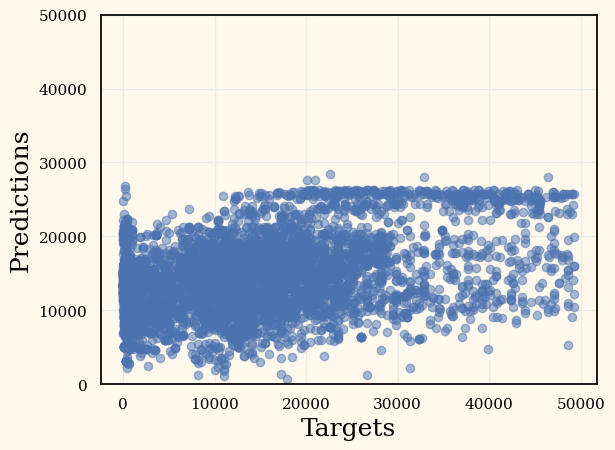

In [41]:
plt.scatter(y_train,yhat, alpha = 0.5)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.ylim(0,50000)
plt.show()


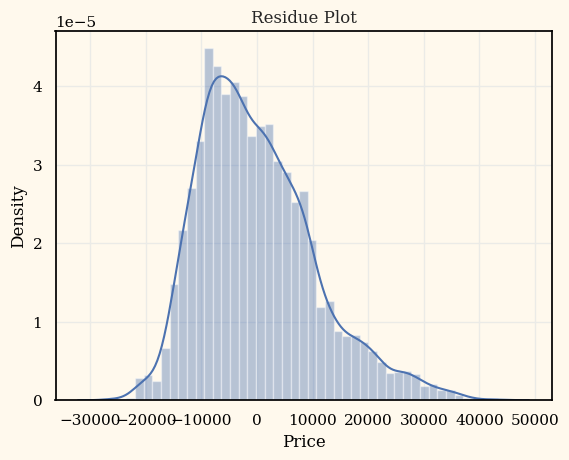

In [42]:
sns.distplot(y_train - yhat)
plt.title('Residue Plot')
plt.show()

In [43]:
reg.score(x_train,y_train)

0.19865024612392668

In [44]:
# finding the bias(intercept) of the model 
reg.intercept_

14170.350660108601

In [45]:
#creating a summary table with the weights or coefficients 
reg_summary = pd.DataFrame(inputs.columns.values , columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Levy,-1868.012705
1,Mileage,-470.669880
2,Airbags,-892.104635
3,Manufacturer_CHEVROLET,-373.393606
4,Manufacturer_FORD,-44.533808
5,Manufacturer_HONDA,-564.486032
6,Manufacturer_HYUNDAI,1989.831529
7,Manufacturer_MERCEDES-BENZ,-918.529312
8,Manufacturer_TOYOTA,1348.429065
9,Category_Jeep,1630.734571


## Prediction

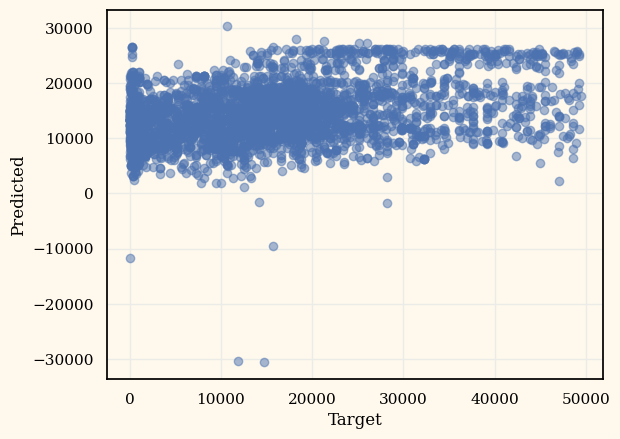

In [46]:
y_predict = reg.predict(x_test)
plt.scatter(y_test,y_predict,alpha = 0.5)
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.show()

In [47]:
prediction = pd.DataFrame(y_predict,columns=['Predicted'])
prediction.sample(5)

,Predicted
2753,19265.775608
641,12053.577618
984,26130.049241
2434,17137.758612
31,9692.614123


In [48]:
# the old index of y_test gets preserved thats why we need to reset it so that it can re order the index
y_test = y_test.reset_index(drop= True)
prediction['Targets'] = y_test
prediction.sample(5)

,Predicted,Targets
2436,18721.987510,11917
815,11692.827352,13397
1249,8256.018571,8938
3585,12346.729806,5802
1980,26133.383028,35570


In [49]:
# residuals 
# since the main objective of OLS is to minimize the Total Sum of Squares error (Residuals) this column is essential
prediction['Residuals'] = prediction['Targets'] - prediction['Predicted']
prediction.sample(5)

,Predicted,Targets,Residuals
2455,18455.817267,13172,-5283.817267
2541,12467.664155,19676,7208.335845
562,10072.356235,5802,-4270.356235
2426,11255.068767,10976,-279.068767
463,17411.999856,16599,-812.999856


<div class="alert alert-block alert-info">
</div>

## <font color = 'navy'> Outcome of Baseline model  
We used Linear Regression as our baseline model to evaluate our dataset. Following are the results :<br>
- R-squared value of our model was very low (0.1986). Which means that 19.86% of the variance in the dependent variable can be explained by the independent variable. R-squared is also called goodness of fit so we can already conclude that our baseline model didn't fit well with the data.
- Predicted values are higher than the target values. In other words , the negative value of the residual values denote that out model is overestimating the response variable or 'Price' in our case.
<br>

The reason this happened is because our model isn't linear. The graphs shown above i.e., Target vs Predicted graph or the pairplot above proves this statement that there is no direct linear relationship among variables. 

<div class="alert alert-block alert-info">
</div>